<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two
## Anna-Maria Berezovski
## CSC 687
## February 7, 2022

## Importing the Inital Data


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Reading in the recipe dataset as a dataframe
df = pd.read_csv('epi_r.csv')

In [215]:
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair wit

In [216]:
df.info

<bound method DataFrame.info of                                              title  rating  ...  snack week  turkey
0                  Lentil, Apple, and Turkey Wrap    2.500  ...         0.0     1.0
1      Boudin Blanc Terrine with Red Onion Confit    4.375  ...         0.0     0.0
2                    Potato and Fennel Soup Hodge    3.750  ...         0.0     0.0
3                 Mahi-Mahi in Tomato Olive Sauce    5.000  ...         0.0     0.0
4                        Spinach Noodle Casserole    3.125  ...         0.0     0.0
...                                            ...     ...  ...         ...     ...
20047                              Parmesan Puffs    3.125  ...         0.0     0.0
20048              Artichoke and Parmesan Risotto    4.375  ...         0.0     0.0
20049                       Turkey Cream Puff Pie    4.375  ...         0.0     1.0
20050     Snapper on Angel Hair with Citrus Cream    4.375  ...         0.0     0.0
20051  Baked Ham with Marmalade-Horseradish 

## Cleaning the Data


Now that we have our data imported into the notebook, we need to clean the data first to ensure that we are using values only once, that the values have complete and usable information, etc...

First, I am going to use less columns so the data becomes easier to handle. I will work with the columns "rating", "calories", "protein", "fat", and "sodium" since these categories are directly related to how healthy the recipie is. we also include #cakeweek to be used at the end to run the logistic regression

In [217]:
df = df[["rating", "calories", "protein", "fat", "sodium", "#cakeweek"]]

df

,rating,calories,protein,fat,sodium,#cakeweek
0,2.500,426.0,30.0,7.0,559.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0
3,5.000,NaN,NaN,NaN,NaN,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0
...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0
20050,4.375,631.0,45.0,24.0,517.0,0.0


Now to further clean the data, I want to remove data points which are incomplete as seen in entry 3:

In [218]:
print(df.loc[[3]])

   rating  calories  protein  fat  sodium  #cakeweek
3     5.0       NaN      NaN  NaN     NaN        0.0


In [219]:
df = df.dropna()

df

,rating,calories,protein,fat,sodium,#cakeweek
0,2.500,426.0,30.0,7.0,559.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0
...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0
20050,4.375,631.0,45.0,24.0,517.0,0.0


In [220]:
# Now we are going to remove duplicates from the dataframe
df = df.drop_duplicates()

df

,rating,calories,protein,fat,sodium,#cakeweek
0,2.500,426.0,30.0,7.0,559.0,0.0
1,4.375,403.0,18.0,23.0,1439.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0
...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0
20050,4.375,631.0,45.0,24.0,517.0,0.0


We have now dropped all the rows which were incomplete (containing NaN)

We are now going to remove all the data points where the entry for these variables is 0 (since they all should have some value) in order to do that, we are going to change the variable type from float to int such that we can remove all the rows which contain 0 values for the variables.

In [221]:
df=df.astype(int)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14414 entries, 0 to 20051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   rating     14414 non-null  int64
 1   calories   14414 non-null  int64
 2   protein    14414 non-null  int64
 3   fat        14414 non-null  int64
 4   sodium     14414 non-null  int64
 5   #cakeweek  14414 non-null  int64
dtypes: int64(6)
memory usage: 788.3 KB


In [223]:
df

,rating,calories,protein,fat,sodium,#cakeweek
0,2,426,30,7,559,0
1,4,403,18,23,1439,0
2,3,165,6,7,165,0
4,3,547,20,32,452,0
5,4,948,19,79,1042,0
...,...,...,...,...,...,...
20047,3,28,2,2,64,0
20048,4,671,22,28,583,0
20049,4,563,31,38,652,0
20050,4,631,45,24,517,0


Now, we can remove the rows

In [224]:
index_names = df[ df['fat'] == 0 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

index_names = df[ df['calories'] == 0 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

index_names = df[ df['protein'] == 0 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

index_names = df[ df['sodium'] == 0 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13178 entries, 0 to 20051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   rating     13178 non-null  int64
 1   calories   13178 non-null  int64
 2   protein    13178 non-null  int64
 3   fat        13178 non-null  int64
 4   sodium     13178 non-null  int64
 5   #cakeweek  13178 non-null  int64
dtypes: int64(6)
memory usage: 720.7 KB


Now we will look at the data to see there are very skewed trends in the data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c8c557a90>]],
      dtype=object)

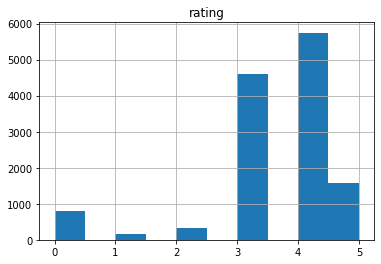

In [225]:
pd.DataFrame(df['rating']).hist()

Now we will try and scale the data

In [226]:
# StandardScale the data

from sklearn.preprocessing import StandardScaler

# also try MinMaxScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

scaled_data

array([[-1.25664572, -0.01740996, -0.01934766, -0.0174932 , -0.01820724,
        -0.02134272],
       [ 0.48021277, -0.01746846, -0.02260886, -0.01677775, -0.01579938,
        -0.02134272],
       [-0.38821647, -0.01807385, -0.02587005, -0.0174932 , -0.01928531,
        -0.02134272],
       ...,
       [ 0.48021277, -0.01706148, -0.0190759 , -0.01610702, -0.01795277,
        -0.02134272],
       [ 0.48021277, -0.01688852, -0.01527117, -0.01673304, -0.01832216,
        -0.02134272],
       [ 0.48021277, -0.01706911, -0.00766171, -0.01735905, -0.00961829,
        -0.02134272]])

In [227]:
dfScaled = pd.DataFrame(scaled_data, columns = ['rating','calories','protein', 'fat', 'sodium', '#cakeweek'])

## Pair-Wise Pearson Correlation

Now we will compute the pearson correlation coefficient r for these varaibles to see their relationship with rating

In [228]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = dfScaled.corr()

corr_matrix["rating"].sort_values(ascending=False)

rating       1.000000
protein      0.015900
sodium       0.009268
calories     0.008631
fat          0.007670
#cakeweek    0.000982
Name: rating, dtype: float64

## PCA

In [229]:
# Apply PCA

from sklearn.decomposition import PCA

# option 1: only select 2 components
pca1 = PCA(n_components=2)
pca1.fit(dfScaled)


# option 2: select all components that explain 95% of variance
pca2 = PCA()
pca2.fit(dfScaled)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its first 2 principal components
x_pca1 = pca1.transform(dfScaled)

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(dfScaled)

In [230]:
print ('Scaled data shape: ', dfScaled.shape)
print ('Transformed data shape: ', x_pca1.shape)
print ('Explained variance by 2 components: ', pca1.explained_variance_ratio_)
print ('#Components explaining 95% of variance: ', d)

Scaled data shape:  (13178, 6)
Transformed data shape:  (13178, 2)
Explained variance by 2 components:  [0.61586406 0.16682471]
#Components explaining 95% of variance:  4


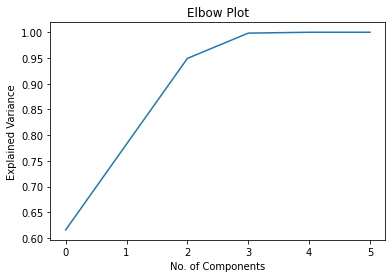

In [231]:
# The elbow plot of the explained variance

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

## Logistic Regression

In [232]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Try the scaled data set as well as the PCA-trasformed data sets x_pca1 and x_pca2
#X = df[["calories", "protein", "fat", "sodium"]]
X = dfScaled.astype('int')
Y = dfScaled['#cakeweek'].astype('int')

# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


# Perform logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: part of cakeweek (1) vs. not part of cakeweek (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (13178, 6)
#Training and testing cases (9224, 6) (3954, 6)
Confusion matrix:


,0,1
0,3953,0
1,0,0


## Healthy

First we need to define "healthy" and in this case I will define it as a food which has less than 500 calories and las sodium less than 100 and fat less than 100

In [233]:
df['healthy'] = (df['calories']<500) & (df['fat']<100) & (df['sodium']<100)
df['healthy'] = df['healthy'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c8c7fef90>]],
      dtype=object)

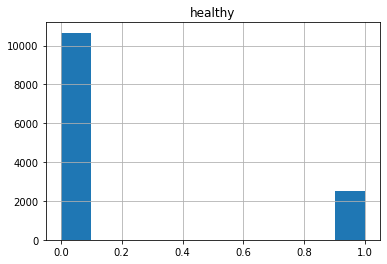

In [234]:
pd.DataFrame(df['healthy']).hist()

Now we will look at the relationship between this new variable healthy and the rating of the food

In [235]:
corr_matrix = df.corr()

corr_matrix["rating"].sort_values(ascending=False)

rating       1.000000
protein      0.015900
sodium       0.009268
calories     0.008631
fat          0.007670
#cakeweek    0.000982
healthy     -0.081046
Name: rating, dtype: float64

Here, using the pair-wise Pearson correlation, we see that the R value between healthy and rating is -0.08 which indiactes a weak correlation between the two values. We will now include this healthy variable and see if our model can predict better with this additional variable

In [237]:
# Split the data set and perform logistic regression
from sklearn.model_selection import train_test_split

# Try the scaled data set as well as the PCA-trasformed data sets x_pca1 and x_pca2
#X = df[["calories", "protein", "fat", "sodium"]]
X = df
Y = df['#cakeweek'].astype('int')

# Split the dataset into the training set (70%) and testing (30%)
# random_state Controls the shuffling applied to the data before applying the split. 
# Pass an int for reproducible output across multiple function calls.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


# Perform logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# labels are: part of cakeweek (1) vs. not part of cakeweek (0)
labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)

#Total cases (13178, 7)
#Training and testing cases (9224, 7) (3954, 7)
Confusion matrix:


,0,1
0,3952,1
1,1,0
